In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'/Users/rahulpoojith/Downloads/spam.csv',encoding='ISO-8859-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

## Data Cleaning

In [6]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
2443,ham,&lt;#&gt; great loxahatchee xmas tree burning...
819,ham,\BOO BABE! U ENJOYIN YOURJOB? U SEEMED 2 B GET...
4193,ham,Can not use foreign stamps in this country.
2121,ham,In xam hall boy asked girl Tell me the startin...
3270,spam,You have 1 new voicemail. Please call 08719181...


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [8]:
df['target'] = encoder.fit_transform(df['target'])

In [9]:
## misiing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [10]:
# Check for duplicate values
df.duplicated().sum()

403

In [11]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [12]:
df.duplicated().sum()

0

In [13]:
df.shape

(5169, 2)

## Exploratory Data Analysis

In [14]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x176b530d0>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

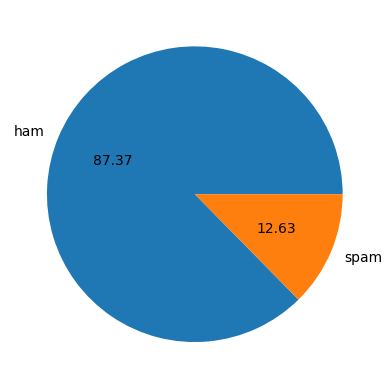

In [15]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct="%0.2f")

##### Data is imbalanced

In [16]:
import nltk

In [17]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rahulpoojith/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
## finds the length of all characters
df['num_characters']=df['text'].apply(len)

In [19]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [20]:
## Fetch number of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [21]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [22]:
df['num_sent']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [23]:
df.head()

,target,text,num_characters,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [24]:
df[['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
df[df['target']==0][['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: xlabel='num_characters', ylabel='Count'>

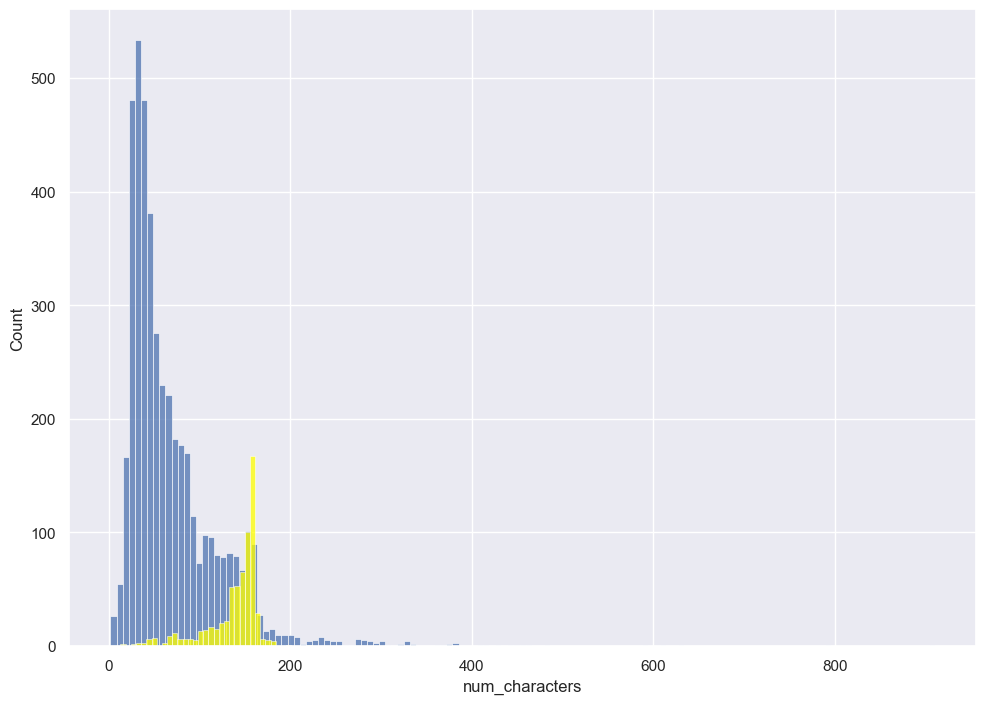

In [26]:
import seaborn as sns
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='yellow')


<Axes: xlabel='num_words', ylabel='Count'>

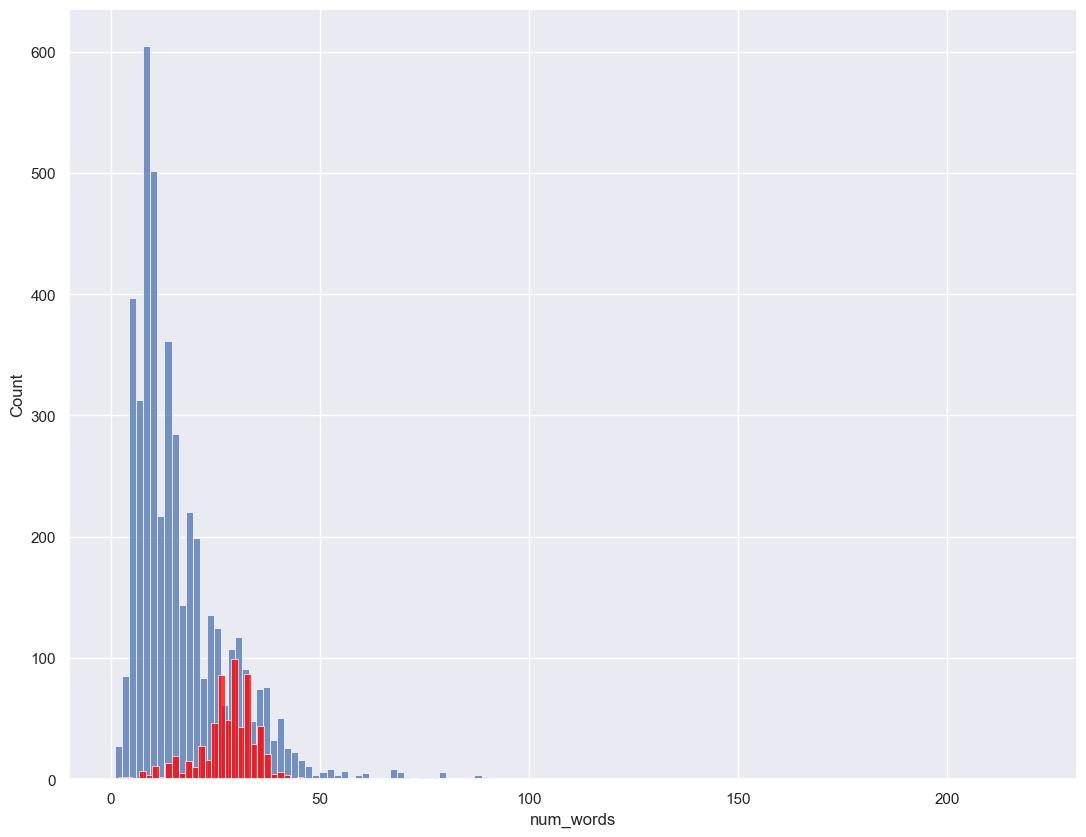

In [27]:
import seaborn as sns
sns.set_theme(rc={'figure.figsize':(13,10)})
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

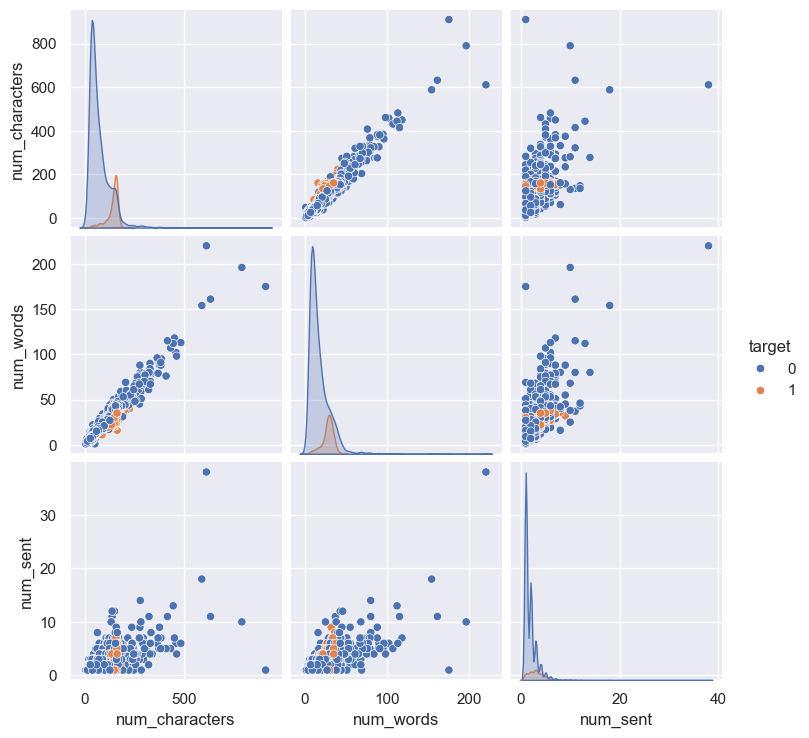

In [28]:
sns.set_theme(rc={'figure.figsize':(20,13)})
sns.pairplot(df,hue='target')

/var/folders/yj/rvwvcq2x2nj9j_gzg45kqw6c0000gn/T/ipykernel_47267/4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

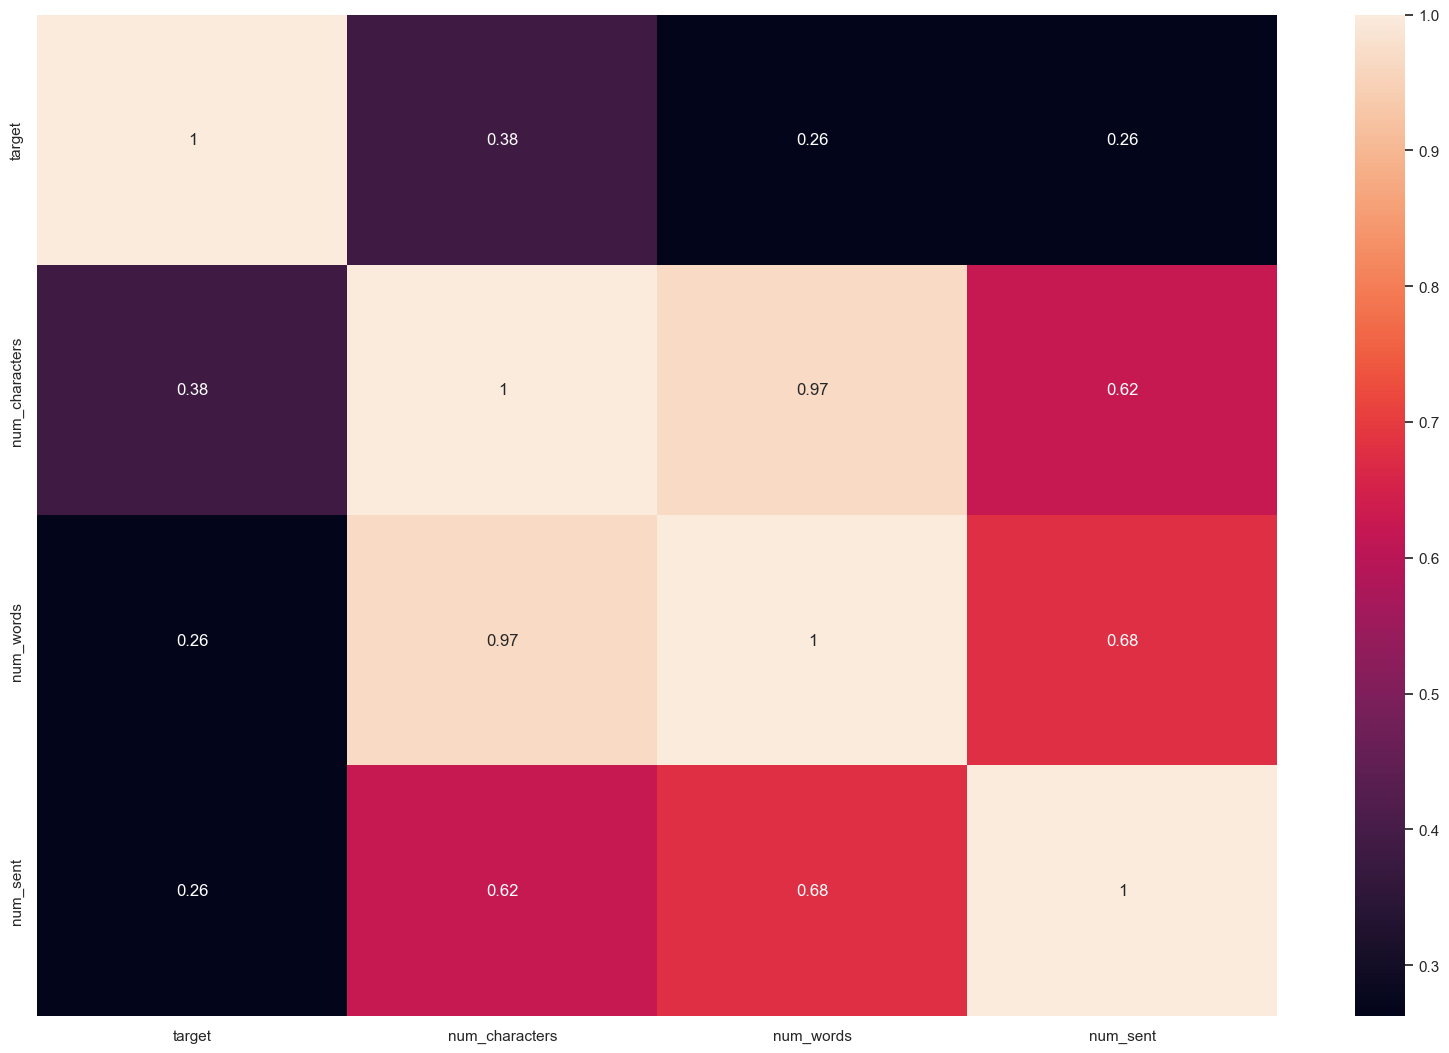

In [29]:
sns.heatmap(df.corr(),annot=True)

## Data Preprocessing

1) Coversion to Lower cases
2) Tokenization
3) Removing Special Charcaters
4) Removing stop words and punctuation
5) Stemming

In [30]:
## converting to lower cases


def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return  " ".join(y)

In [31]:
from nltk.corpus import stopwords


In [32]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [33]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [34]:
df['transformed_text']=df['text'].apply(transform_text)

In [35]:

df.head()

,target,text,num_characters,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [36]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [37]:
spam_wc=wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

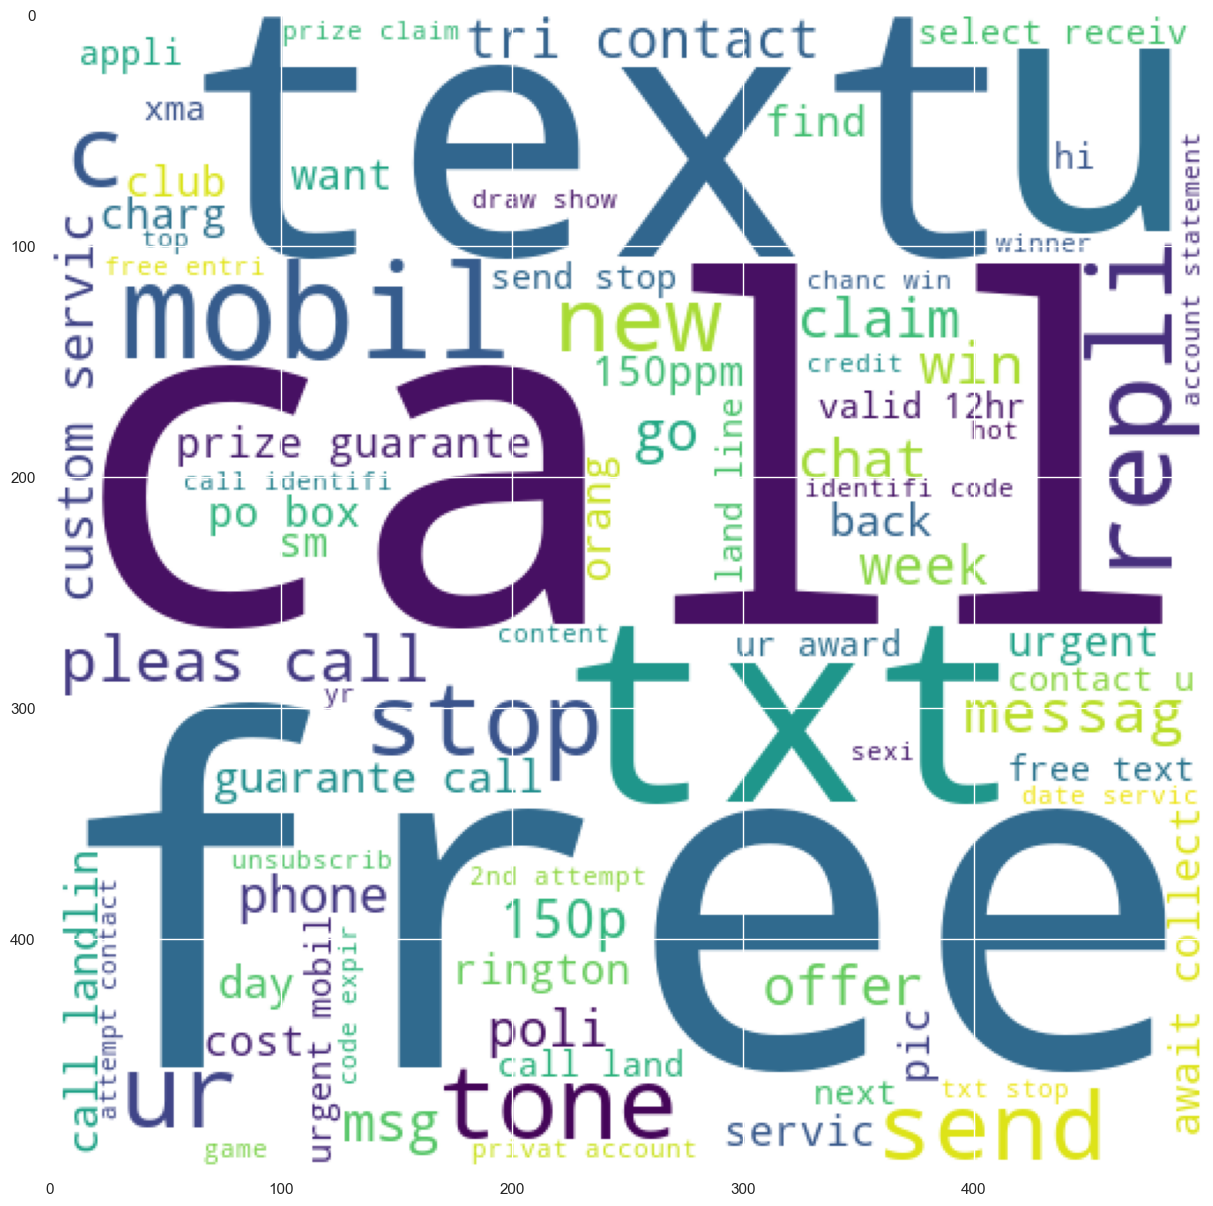

In [38]:
plt.figure(figsize=(20,15))
plt.imshow(spam_wc)

In [39]:
ham_wc=wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

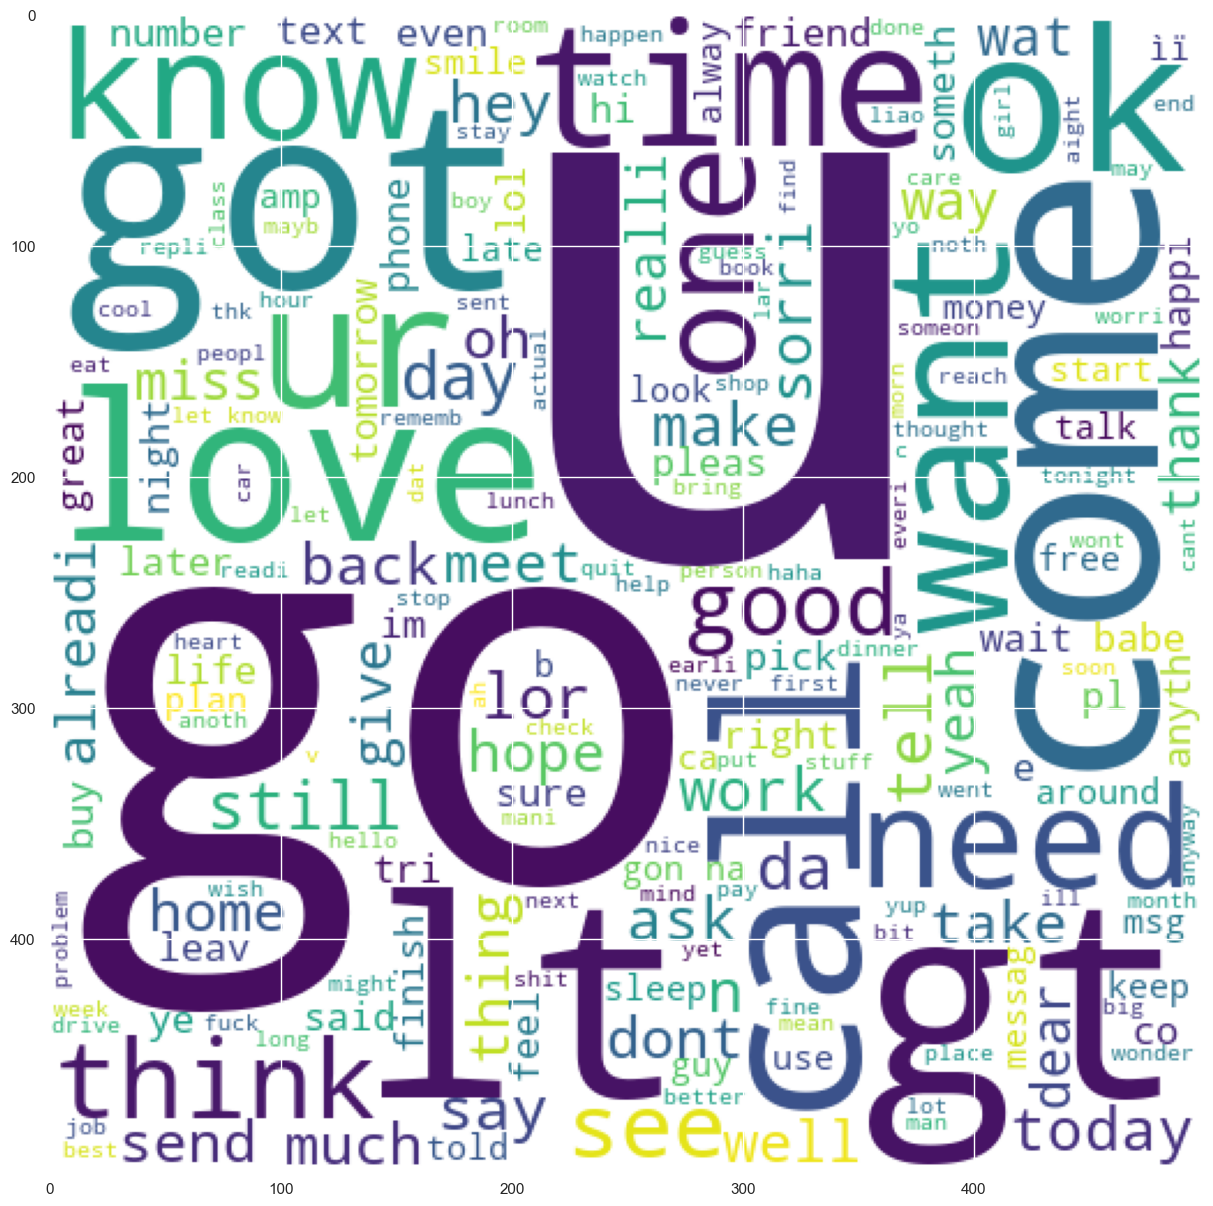

In [40]:
plt.figure(figsize=(20,15))
plt.imshow(ham_wc)

In [41]:
df.head()

,target,text,num_characters,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [42]:
spam_corpus = []
for message in df[df['target']== 1]['transformed_text'].tolist():
    for words in message.split():
        spam_corpus.append(words)

In [43]:
len(spam_corpus)

9939

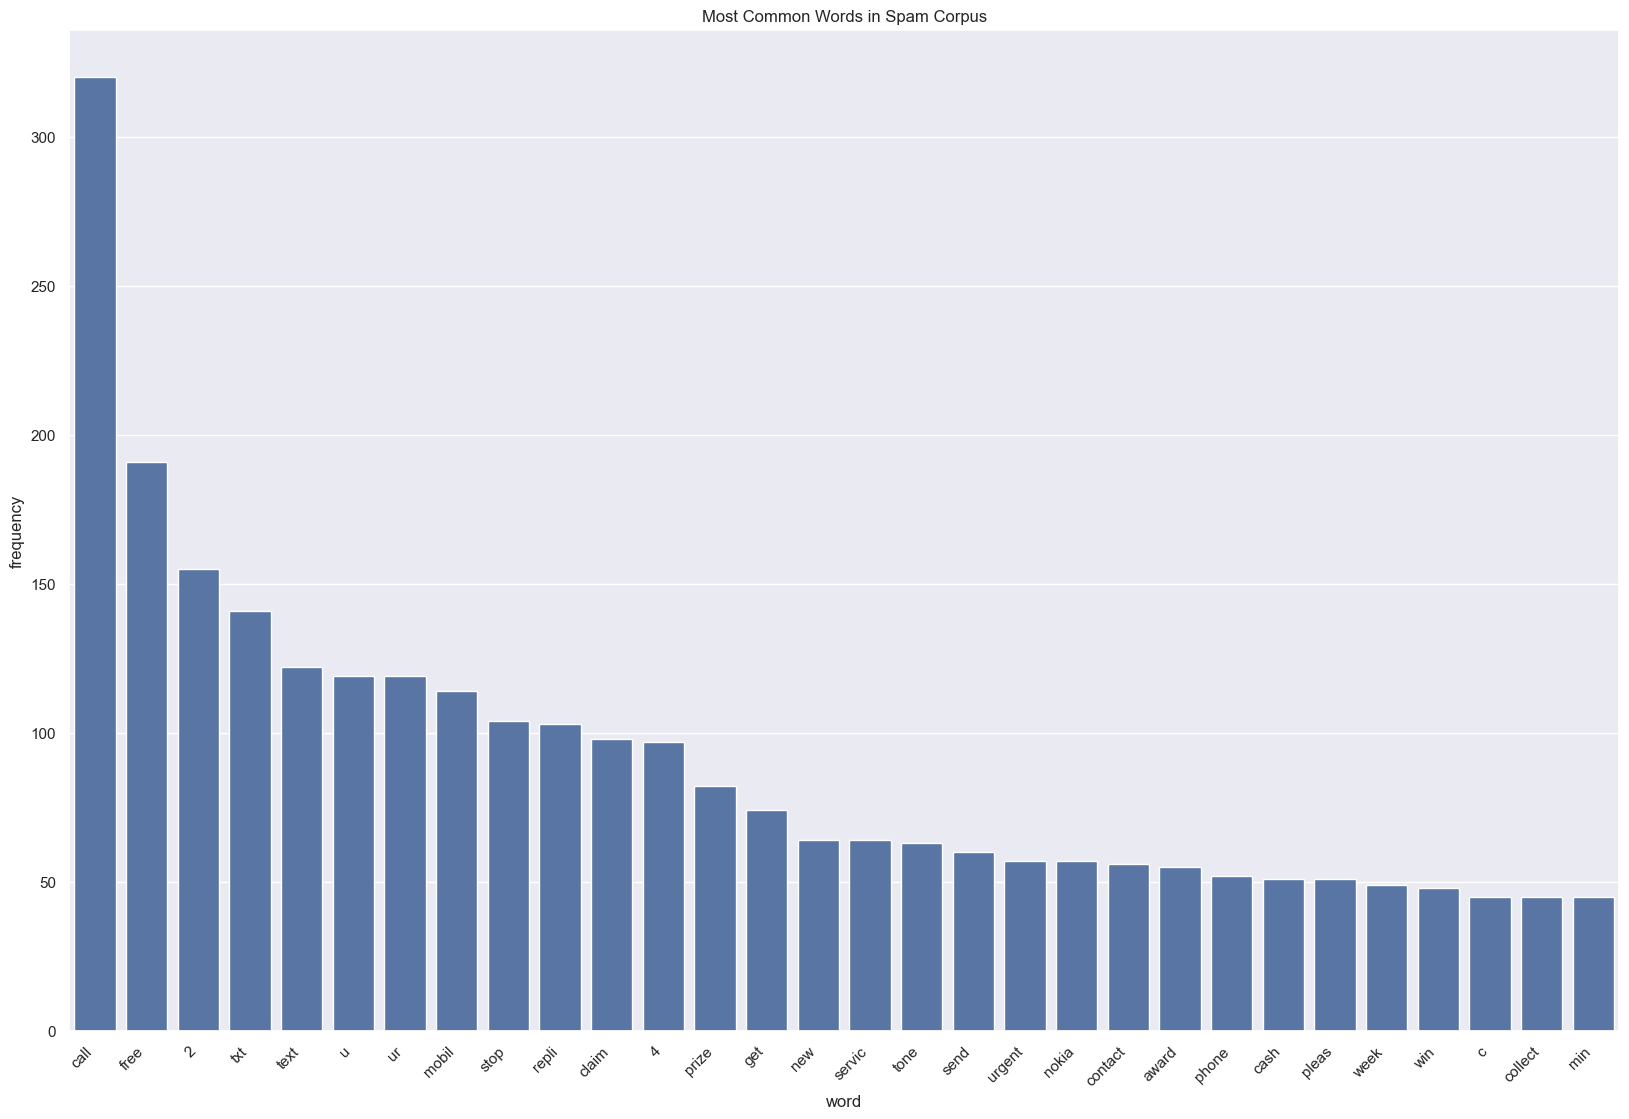

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
# Directly using the DataFrame in the seaborn plot
sns.barplot(
    x=pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'frequency'])['word'],
    y=pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'frequency'])['frequency']
)

plt.xticks(rotation=45, ha='right')
plt.title('Most Common Words in Spam Corpus')
plt.show()

In [53]:
ham_corpus = []
for message in df[df['target']== 0]['transformed_text'].tolist():
    for words in message.split():
        ham_corpus.append(words)

In [54]:
len(ham_corpus)

35404

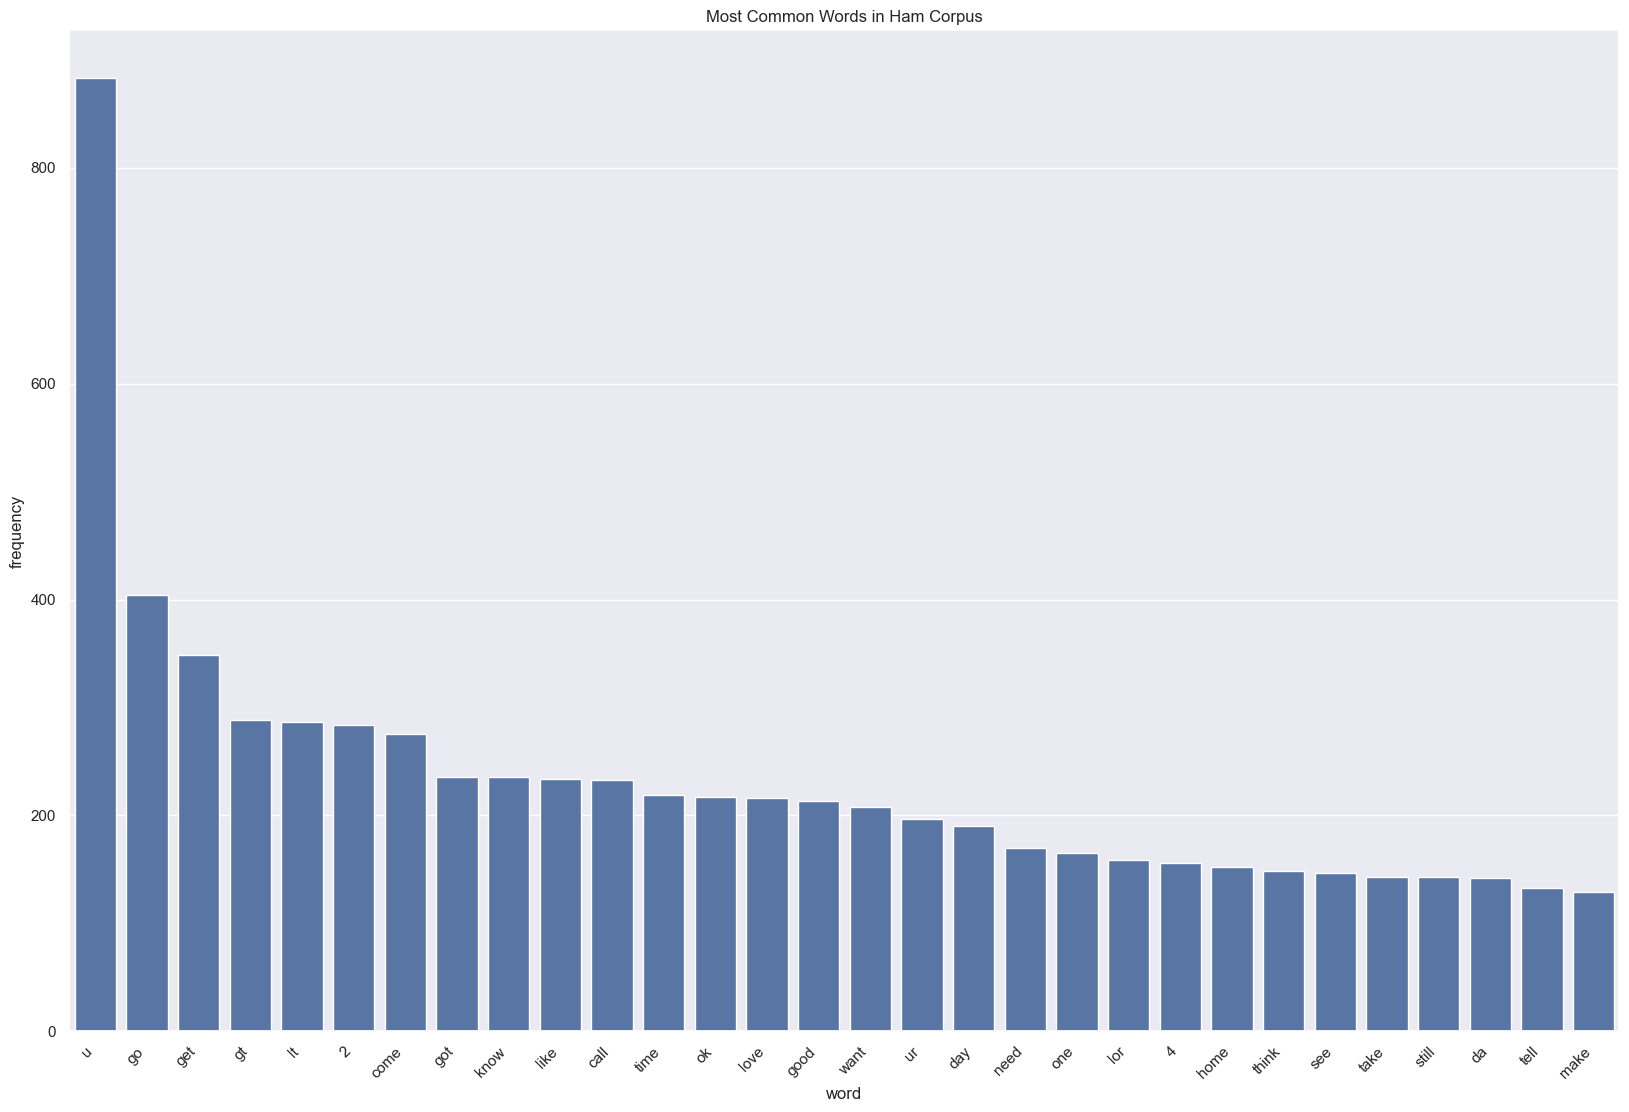

In [55]:
sns.barplot(
    x=pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'frequency'])['word'],
    y=pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'frequency'])['frequency']
)

plt.xticks(rotation=45, ha='right')
plt.title('Most Common Words in Ham Corpus')
plt.show()

## Model Building

#### Naive Baye's Classification

In [94]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tf=TfidfVectorizer(max_features=3000)

In [95]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [96]:
X.shape

(5169, 6708)

In [97]:
y = df['target'].values

In [98]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=100)

In [100]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [101]:
gb=GaussianNB()
mb=MultinomialNB()
bb=BernoulliNB()

In [102]:
gb.fit(X_train,y_train)
y_pred1 = gb.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred1))
print("Confusion Matrix:",
      confusion_matrix(y_test,y_pred1))
print("Precision Score: ",precision_score(y_test,y_pred1))

Accuracy Score:  0.8491295938104448
Confusion Matrix: [[764 139]
 [ 17 114]]
Precision Score:  0.4505928853754941


In [103]:
mb.fit(X_train,y_train)
y_pred1 = mb.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred1))
print("Confusion Matrix:",
      confusion_matrix(y_test,y_pred1))
print("Precision Score: ",precision_score(y_test,y_pred1))

Accuracy Score:  0.9787234042553191
Confusion Matrix: [[889  14]
 [  8 123]]
Precision Score:  0.8978102189781022


In [104]:
bb.fit(X_train,y_train)
y_pred1 = bb.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred1))
print("Confusion Matrix:",
      confusion_matrix(y_test,y_pred1))
print("Precision Score: ",precision_score(y_test,y_pred1))

Accuracy Score:  0.9748549323017408
Confusion Matrix: [[898   5]
 [ 21 110]]
Precision Score:  0.9565217391304348


In [105]:
X = tf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=100)


In [106]:
gb.fit(X_train,y_train)
y_pred1 = gb.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred1))
print("Confusion Matrix:",
      confusion_matrix(y_test,y_pred1))
print("Precision Score: ",precision_score(y_test,y_pred1))

Accuracy Score:  0.8471953578336557
Confusion Matrix: [[765 138]
 [ 20 111]]
Precision Score:  0.4457831325301205


In [107]:
mb.fit(X_train,y_train)
y_pred1 = mb.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred1))
print("Confusion Matrix:",
      confusion_matrix(y_test,y_pred1))
print("Precision Score: ",precision_score(y_test,y_pred1))

Accuracy Score:  0.9796905222437138
Confusion Matrix: [[903   0]
 [ 21 110]]
Precision Score:  1.0


In [108]:
bb.fit(X_train,y_train)
y_pred1 = bb.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred1))
print("Confusion Matrix:",
      confusion_matrix(y_test,y_pred1))
print("Precision Score: ",precision_score(y_test,y_pred1))

Accuracy Score:  0.9825918762088974
Confusion Matrix: [[901   2]
 [ 16 115]]
Precision Score:  0.9829059829059829


In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [110]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [112]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [113]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [114]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9816247582205029, 0.9827586206896551)

In [115]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9816247582205029
Precision -  0.9827586206896551
For  KN
Accuracy -  0.9323017408123792
Precision -  1.0
For  NB
Accuracy -  0.9796905222437138
Precision -  1.0
For  DT
Accuracy -  0.9429400386847195
Precision -  0.8272727272727273
For  LR
Accuracy -  0.9487427466150871
Precision -  0.9239130434782609
For  RF
Accuracy -  0.9796905222437138
Precision -  0.9741379310344828


/Users/rahulpoojith/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9700193423597679
Precision -  0.9464285714285714
For  BgC
Accuracy -  0.9700193423597679
Precision -  0.9098360655737705
For  ETC
Accuracy -  0.9835589941972921
Precision -  0.9830508474576272
For  GBDT
Accuracy -  0.9535783365570599
Precision -  0.9560439560439561
For  xgb
Accuracy -  0.9680851063829787
Precision -  0.9016393442622951


In [116]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [117]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.932302,1.000000
2,NB,0.979691,1.000000
8,ETC,0.983559,0.983051
0,SVC,0.981625,0.982759
5,RF,0.979691,0.974138
9,GBDT,0.953578,0.956044
6,AdaBoost,0.970019,0.946429
4,LR,0.948743,0.923913
7,BgC,0.970019,0.909836
10,xgb,0.968085,0.901639


## Improving Model Performance

In [118]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [119]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [120]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [121]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [122]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [123]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.932302,1.000000,0.932302,1.000000,0.932302,1.000000,0.932302,1.000000
1,NB,0.979691,1.000000,0.979691,1.000000,0.979691,1.000000,0.979691,1.000000
2,ETC,0.983559,0.983051,0.983559,0.983051,0.983559,0.983051,0.983559,0.983051
3,SVC,0.981625,0.982759,0.981625,0.982759,0.981625,0.982759,0.981625,0.982759
4,RF,0.979691,0.974138,0.979691,0.974138,0.979691,0.974138,0.979691,0.974138
5,GBDT,0.953578,0.956044,0.953578,0.956044,0.953578,0.956044,0.953578,0.956044
6,AdaBoost,0.970019,0.946429,0.970019,0.946429,0.970019,0.946429,0.970019,0.946429
7,LR,0.948743,0.923913,0.948743,0.923913,0.948743,0.923913,0.948743,0.923913
8,BgC,0.970019,0.909836,0.970019,0.909836,0.970019,0.909836,0.970019,0.909836
9,xgb,0.968085,0.901639,0.968085,0.901639,0.968085,0.901639,0.968085,0.901639


In [124]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [125]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [126]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [127]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.988394584139265
Precision 1.0


In [128]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [129]:
from sklearn.ensemble import StackingClassifier

In [130]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [131]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9516129032258065


In [132]:
import pickle
pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))